In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import pickle

from flygym.envs.nmf_mujoco import MuJoCoParameters
from flygym.arena.mujoco_arena import FlatTerrain
import flygym.util.vision as vision
from odor_vision import ObstacleOdorArena, NMFObservation


In [2]:
sim_params = MuJoCoParameters(render_playspeed=0.2, render_camera="Animat/camera_top_zoomout", render_raw_vision=True, enable_olfaction=True)

save_path = "../../data"
num_pos = 20
steps = 1

In [3]:
a = ObstacleOdorArena()

print(a.get_walls_distance(np.array([12,-5,0.5]), np.array([np.pi, 0, 0])))

print(a.get_walls_distance(np.array([0,0,0.5]), np.array([np.pi/2, 0, 0])))

[-2.204364238465236e-15, 12.0, True]
[0, 0, False]


In [5]:
dataset = []

for f in trange(num_pos):
    arena = ObstacleOdorArena()
    spawn_pos = (np.random.randint(-1,25),np.random.randint(-12,12),0.5)
    spawn_orient = (0,0,1,np.random.random()*2*np.pi)
    sim = NMFObservation(
        sim_params=sim_params,
        arena=arena,
        obj_threshold=50,
        spawn_pos=spawn_pos,
        spawn_orient=spawn_orient,
        pos_range=[[-1,25], [-12,12]]
    )

    for i in range(steps):
        obs,_,_,_,_ = sim.step([0,0])
        dataset.append(obs)

    sim.close()

  5%|▌         | 1/20 [00:05<01:37,  5.15s/it]

[1.3331495686857706, 9.76500766133664, True]
[0.08973652187252965, 0.90687531922236, True]


 10%|█         | 2/20 [00:09<01:27,  4.88s/it]

[2.6787885078182914, 8.823702185732868, True]
[0.1414918656853189, 0.8676542577388696, True]


 15%|█▌        | 3/20 [00:15<01:26,  5.06s/it]

[0.43494654174153063, 5.823235676796626, True]
[0.05519025160544348, 0.7426348198665261, True]


 20%|██        | 4/20 [00:21<01:26,  5.41s/it]

[0.35877437267883794, 2.9953640419655247, True]
[0.05226055279533992, 0.6248068350818968, True]


 25%|██▌       | 5/20 [00:26<01:22,  5.52s/it]

[-0.9154123877400275, 9.402923310820377, True]
[0.0032533697023066333, 0.8917884712841824, True]


 30%|███       | 6/20 [00:33<01:21,  5.83s/it]

[1.9085477266727493, 0.5390510513482196, True]
[0.1118672202566442, 0.5224604604728426, True]


 35%|███▌      | 7/20 [00:38<01:12,  5.55s/it]

[-0.9935335935595441, -13.106911324013607, True]
[0.00024870794001753574, -0.04612130516723364, True]


 40%|████      | 8/20 [00:43<01:03,  5.32s/it]

[0, 0, False]
[0.038461538461538464, 0.5, False]


 45%|████▌     | 9/20 [00:47<00:56,  5.15s/it]

[-1.2670487314074397, 5.251558516949981, True]
[-0.010271105054132295, 0.7188149382062492, True]


 50%|█████     | 10/20 [00:52<00:51,  5.15s/it]

[5.831725736400667, 4.874533846154352, True]
[0.2627586821692564, 0.703105576923098, True]


 55%|█████▌    | 11/20 [00:57<00:46,  5.11s/it]

[7.940730395743115, 8.164779091456074, True]
[0.3438742459901198, 0.8401991288106698, True]


 60%|██████    | 12/20 [01:02<00:40,  5.01s/it]

[4.445903752388483, -3.728112807804314, True]
[0.20945783663032624, 0.34466196634148694, True]


 65%|██████▌   | 13/20 [01:08<00:36,  5.26s/it]

[7.586299506914027, -7.131655837340222, True]
[0.3302422887274626, 0.2028476734441574, True]


 70%|███████   | 14/20 [01:14<00:32,  5.41s/it]

[11.222692158981287, -7.631845354069045, True]
[0.47010354457620335, 0.18200644358045645, True]


 75%|███████▌  | 15/20 [01:20<00:27,  5.58s/it]

[-7.370022090490847, -14.345582238430163, True]
[-0.24500084963426336, -0.09773259326792345, True]


 80%|████████  | 16/20 [01:26<00:23,  5.89s/it]

[11.356102913008153, 4.846811486533725, True]
[0.47523472742339046, 0.7019504786055718, True]


 85%|████████▌ | 17/20 [01:32<00:17,  5.88s/it]

[-3.9387661298882617, -9.193203157440943, True]
[-0.11302946653416392, 0.11694986843996073, True]


 90%|█████████ | 18/20 [01:38<00:11,  5.86s/it]

[4.507370949971646, -5.413766455407038, True]
[0.2118219596142941, 0.2744263976913734, True]


 95%|█████████▌| 19/20 [01:44<00:05,  5.87s/it]

[2.5708718573573988, -10.441304356737408, True]
[0.13734122528297688, 0.06494565180260799, True]


100%|██████████| 20/20 [01:49<00:00,  5.50s/it]

[-0.61343158034307, 12.162189734194241, True]
[0.014868016140651153, 1.0067579055914269, True]


In [6]:
dataset = np.array(dataset)
with open(save_path+"/dataset_test.pkl", "wb") as f:
    pickle.dump(dataset, f)

In [7]:
with open(save_path+"/dataset_test.pkl", "rb") as f:
    data = pickle.load(f)

[0.08973652 0.90687532 1.        ]


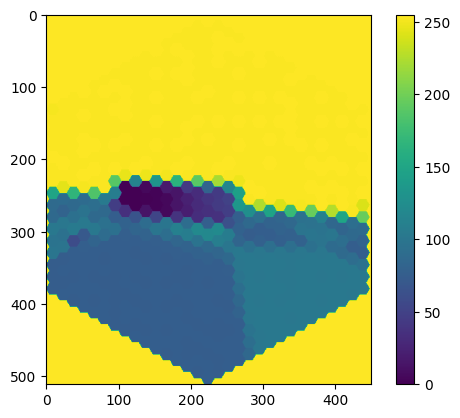

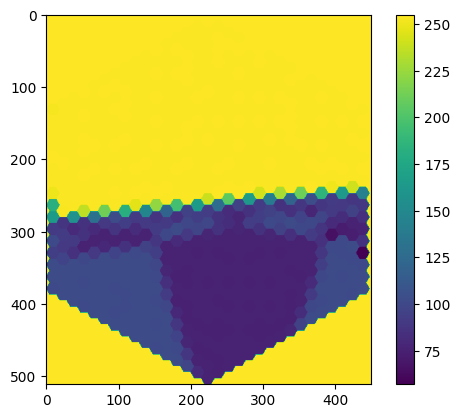

[0.14149187 0.86765426 1.        ]


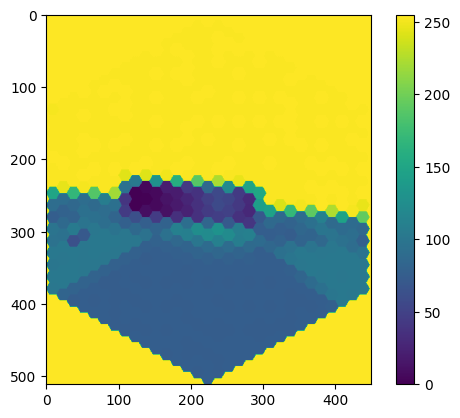

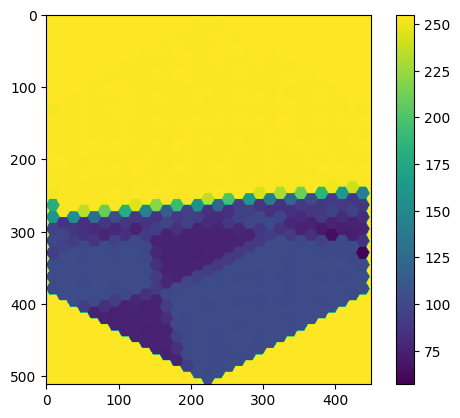

[0.05519025 0.74263482 1.        ]


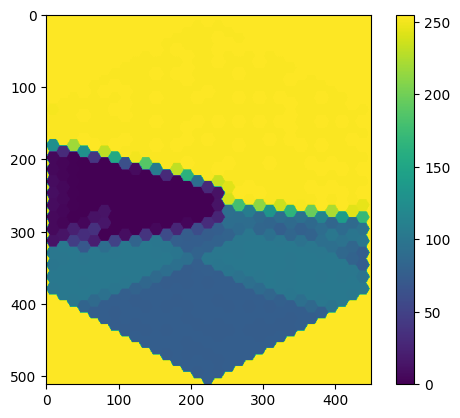

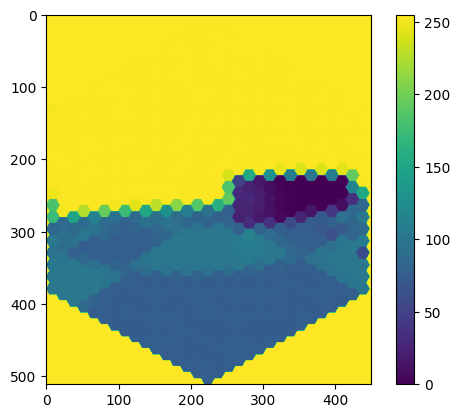

[0.05226055 0.62480684 1.        ]


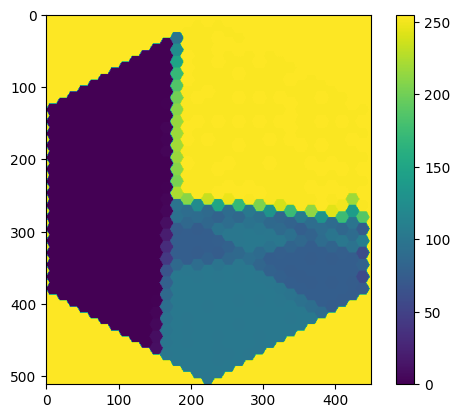

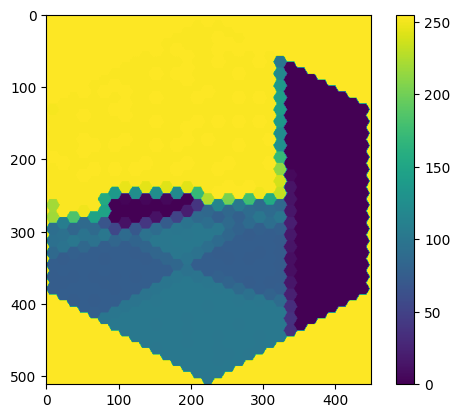

[0.00325337 0.89178847 1.        ]


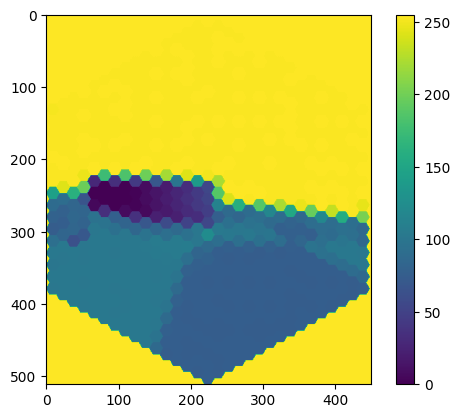

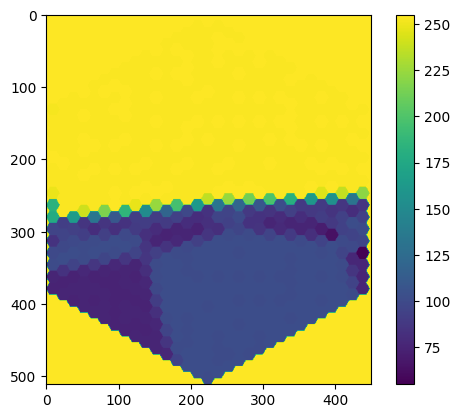

[0.11186722 0.52246046 1.        ]


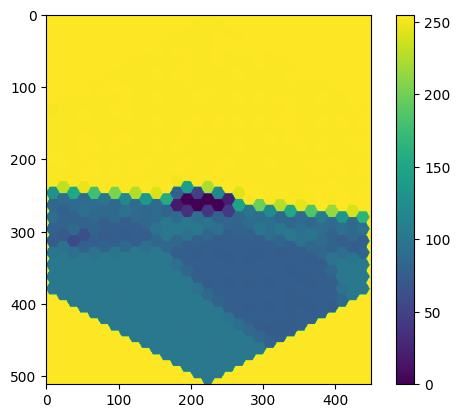

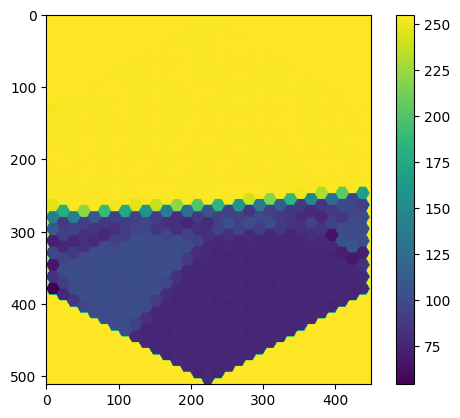

[ 2.48707940e-04 -4.61213052e-02  1.00000000e+00]


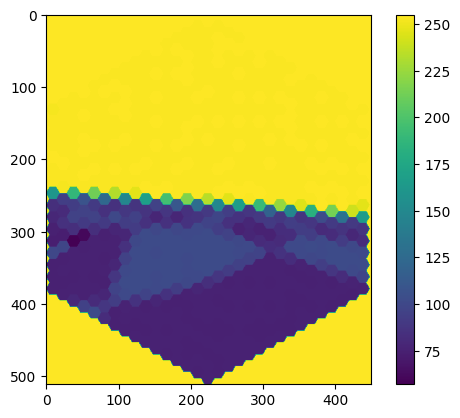

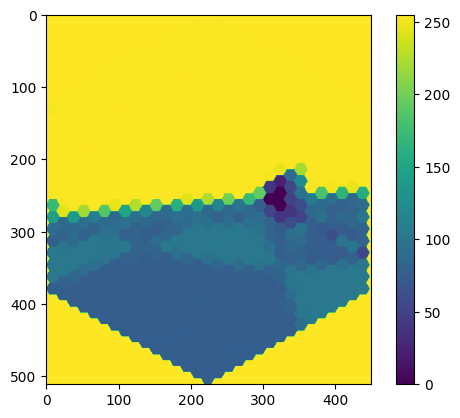

[0.03846154 0.5        0.        ]


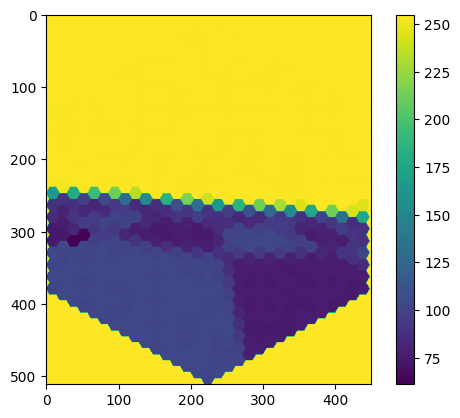

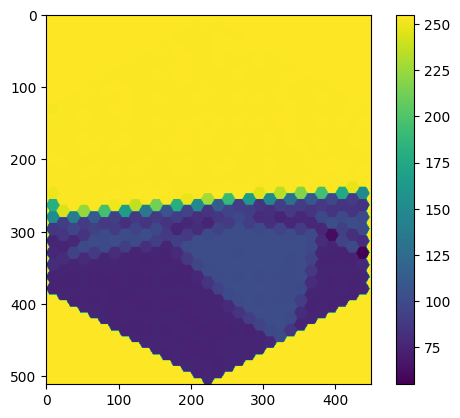

[-0.01027111  0.71881494  1.        ]


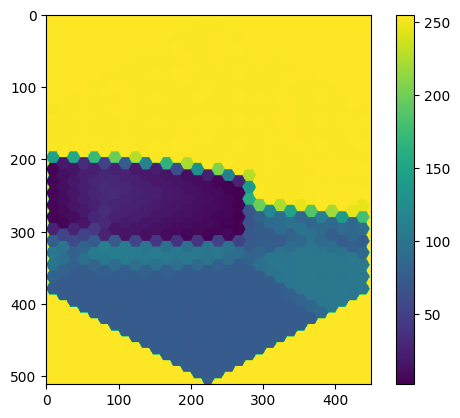

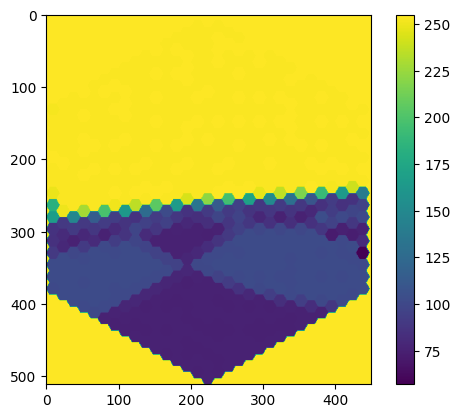

[0.26275868 0.70310558 1.        ]


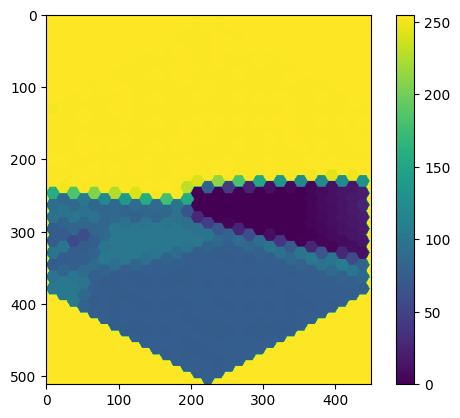

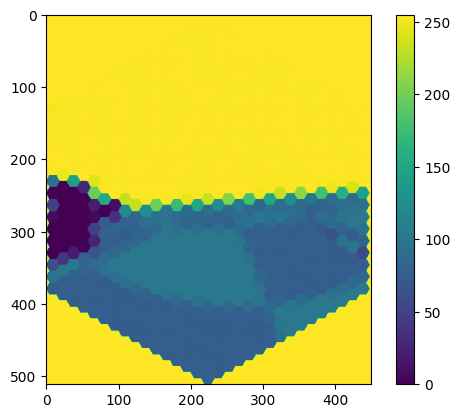

[0.34387425 0.84019913 1.        ]


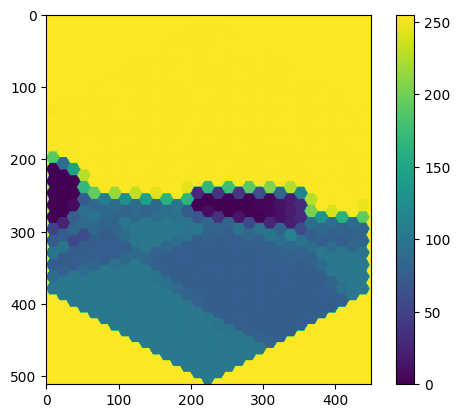

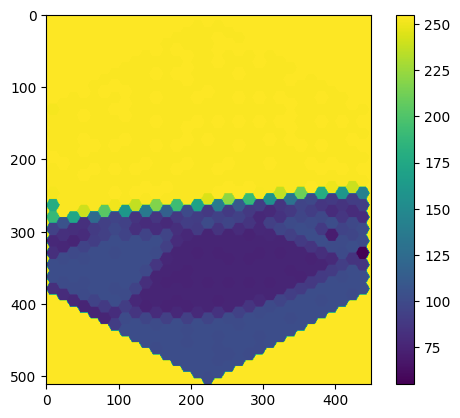

[0.20945784 0.34466197 1.        ]


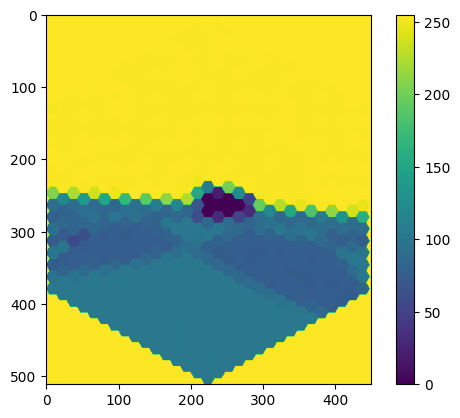

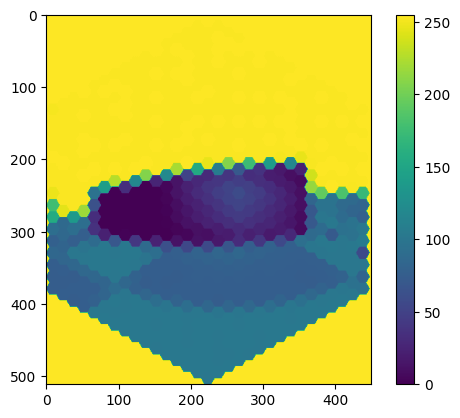

[0.33024229 0.20284767 1.        ]


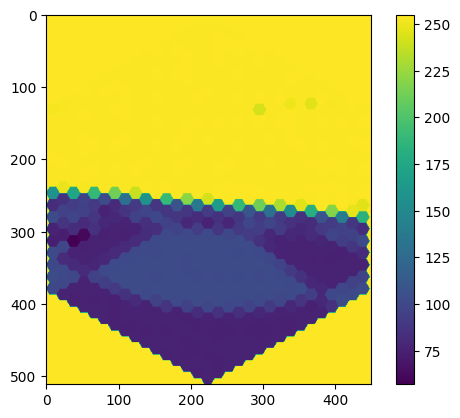

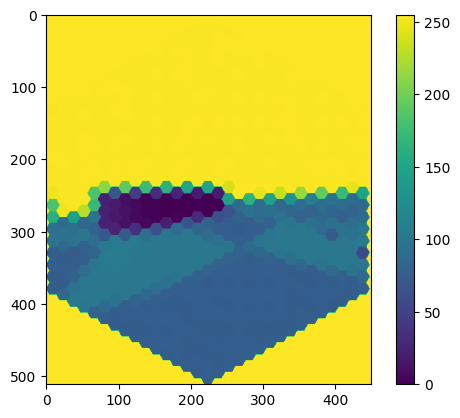

[0.47010354 0.18200644 1.        ]


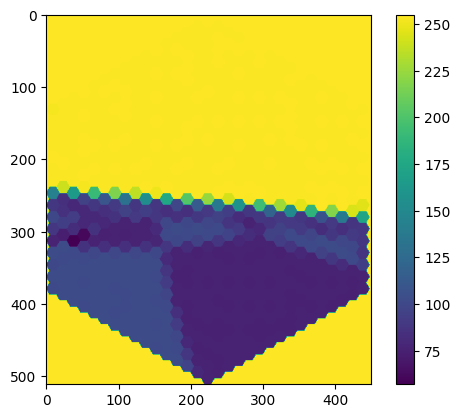

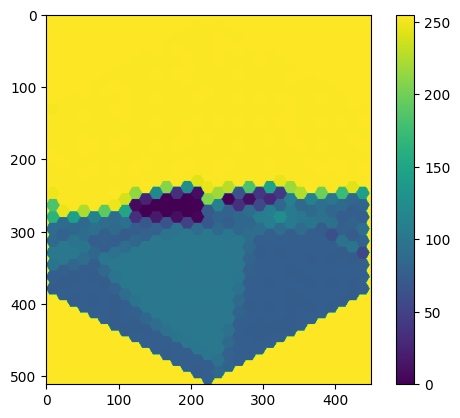

[-0.24500085 -0.09773259  1.        ]


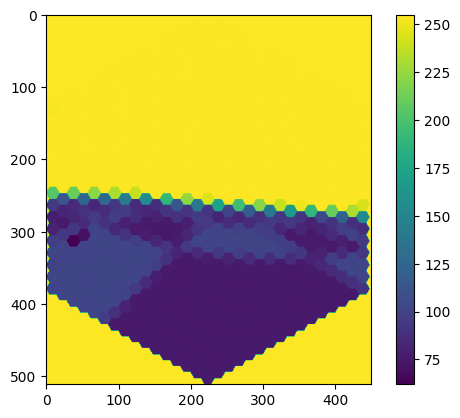

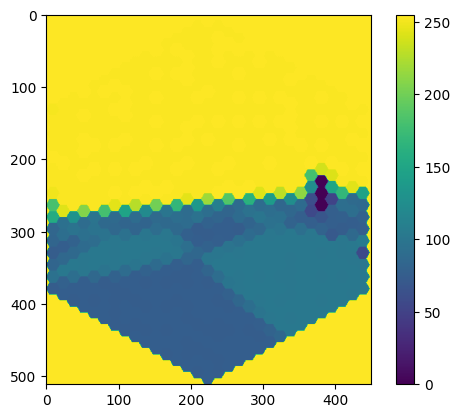

[0.47523473 0.70195048 1.        ]


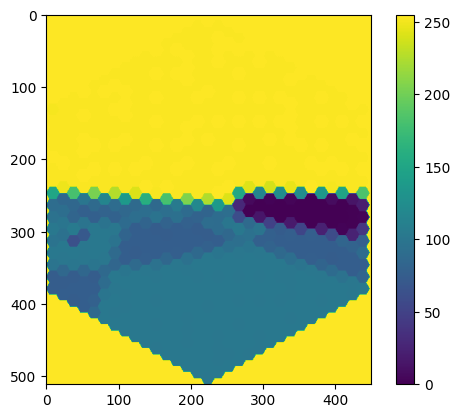

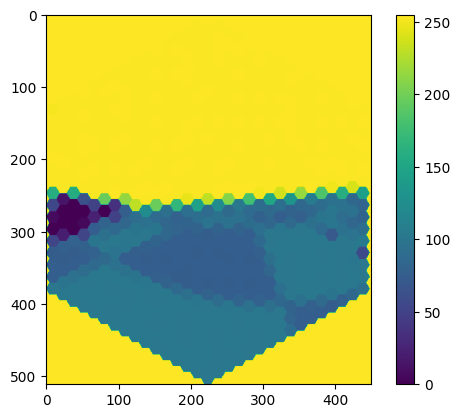

[-0.11302947  0.11694987  1.        ]


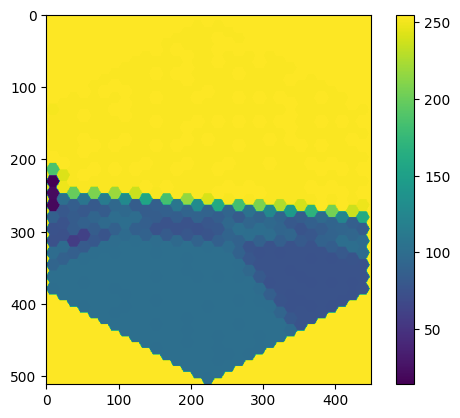

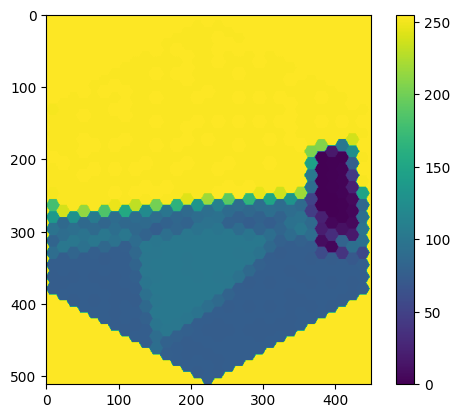

[0.21182196 0.2744264  1.        ]


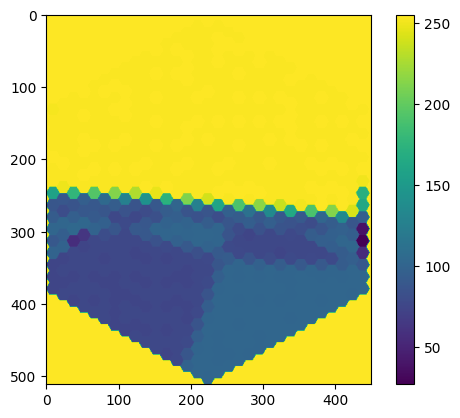

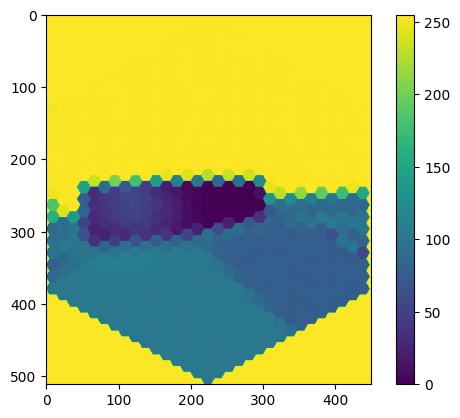

[0.13734123 0.06494565 1.        ]


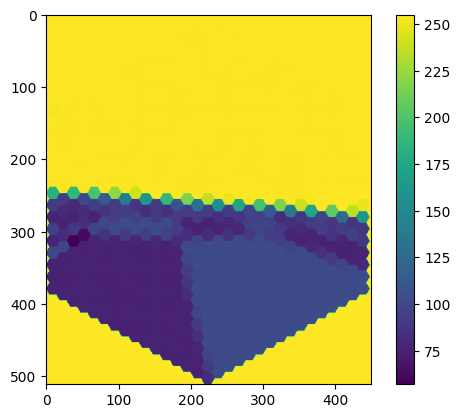

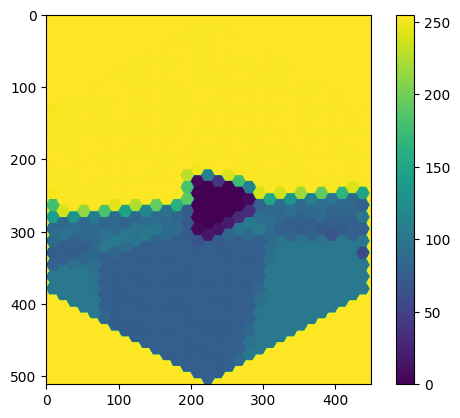

[0.01486802 1.00675791 1.        ]


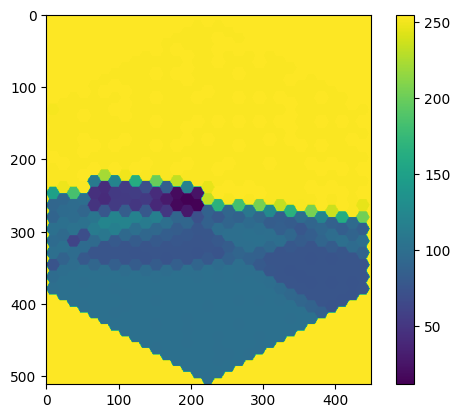

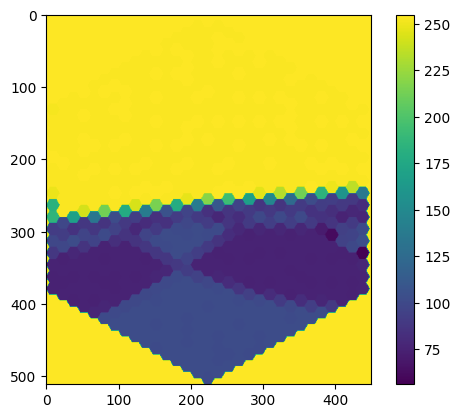

In [9]:
for sample in data:
    vis = sample[:-3]
    features = sample[-3:]
    print(features)

    vis_input = np.array(vis)
    vis_input = np.reshape(vis_input, (2,-1))
    vis_input = np.stack((255*vis_input, np.zeros_like(vis_input)), axis=2)
    hr = vision.hex_pxls_to_human_readable(vis_input[0,:,:], vision.ommatidia_id_map)
    plt.imshow(hr)
    plt.colorbar()
    plt.show()
    hr = vision.hex_pxls_to_human_readable(vis_input[1,:,:], vision.ommatidia_id_map)
    plt.imshow(hr)
    plt.colorbar()
    plt.show()
    